---
format: 
  html:
    embed-resources: true
execute:
  echo: true
code-fold: true
title: Avacado Prices Analysis 
author: James Compagno
jupyter: python3
---

Files and work can be found here: https://github.com/PharaohPooh/GSB_544/tree/main/Week_2/Lab_2_Avocado_Prices 

In [22]:
import numpy as np
import pandas as pd
import plotnine as p9

df_avocado = pd.read_csv("avocado_updated_2020.csv")
df_region = pd.read_csv("region_list.csv")

In [23]:
df_avocado.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


1. Briefly describe the data set. What information does it contain?

The data is a week by week of Avocado sales for the Hass variety across different bag sizes and Product Lookup codes (PLU’s) across multiple regions. Regions are of variying size and some regions conrain data from other datapoints Ie the Los Angeles' region's data is also counted in California, West, and Total US. 

2. Clean the data in any way you see fit.

In [24]:
#Update the regions list by joining df_region on df_avocado
df_avocado_region = df_avocado.merge(df_region, on=["geography"])
#drop the unecessary georgraphy column 
df_avocado_region_clean = df_avocado_region.drop(columns=['geography'])
df_avocado_region_clean.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,state,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,New York,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,New York,Northeast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Georgia,Southeast
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Georgia,Southeast
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore / Washington,Maryland / D.C.,Northeast


In [25]:
#drop all the summary data points (ie "northeast" & "Total U.S."). Ie remove every row without a value in the city column 
df_avocado_region_clean2 = df_avocado_region_clean.dropna(subset=['city'])
df_avocado_region_clean2.iloc[25:36]


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,state,region
27,2015-01-04,1.70,7446.43,361.76,5025.58,0.00,2059.09,746.43,1312.66,0.00,organic,2015,Detroit,Michigan,Great Lakes
28,2015-01-04,0.95,258979.63,1097.00,189348.60,22612.46,45921.57,43899.46,1097.68,924.43,conventional,2015,Grand Rapids,Michigan,Great Lakes
29,2015-01-04,1.60,1012.61,23.59,772.85,0.00,216.17,210.00,6.17,0.00,organic,2015,Grand Rapids,Michigan,Great Lakes
32,2015-01-04,1.05,203939.14,32679.84,121020.54,1286.19,48952.57,47583.64,1368.93,0.00,conventional,2015,Harrisburg / Scranton,Pennsylvania,Northeast
33,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,Harrisburg / Scranton,Pennsylvania,Northeast
34,2015-01-04,1.06,332208.14,6387.60,267593.62,165.35,58061.57,55401.31,2660.26,0.00,conventional,2015,Hartford / Springfield,Connecticut / Massachusetts,Northeast
35,2015-01-04,2.32,4801.10,87.56,4364.01,0.00,349.53,349.53,0.00,0.00,organic,2015,Hartford / Springfield,Connecticut / Massachusetts,Northeast
36,2015-01-04,0.71,1062990.62,506426.58,436347.57,4378.92,115837.55,90299.85,25537.70,0.00,conventional,2015,Houston,Texas,South Central
37,2015-01-04,1.22,8938.32,7009.77,671.88,0.00,1256.67,1256.67,0.00,0.00,organic,2015,Houston,Texas,South Central
38,2015-01-04,1.02,160130.15,4007.41,118435.79,1201.50,36485.45,20325.41,16160.04,0.00,conventional,2015,Indianapolis,Indiana,Great Lakes


In [31]:
#split date into day, month, year 
df_avocado_region_clean3 = df_avocado_region_clean2.copy()

df_avocado_region_clean3['date'] = pd.to_datetime(df_avocado_region_clean3['date'])

df_avocado_region_clean3['year'] = df_avocado_region_clean3['date'].dt.year
df_avocado_region_clean3['month'] = df_avocado_region_clean3['date'].dt.month
df_avocado_region_clean3['day'] = df_avocado_region_clean3['date'].dt.day

In [32]:
#make a better dataframe name but leave room for more transformation later if necessary
df_arc = df_avocado_region_clean3 

#Exercises

3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

Answer:The Northeast region buys the most small bags of avocados 

Assumption: "Major geographical region" means the broader regions such as "Great Lakes" that I have converted into the region column in the dataset not just the four US Census-style regions

In [33]:
organic_2017 = df_arc[(df_arc['type'] == 'organic') & (df_arc['year'] == 2017)]
region_sales = organic_2017.groupby('region')['small_bags'].sum().reset_index()
top_region = region_sales.sort_values('small_bags', ascending=False)
print(top_region)

          region  small_bags
2      Northeast  6967779.31
6           West  4933592.76
4  South Central  2251455.86
5      Southeast  1760517.35
0    Great Lakes  1300624.18
1       Midsouth   119008.08
3         Plains    96767.82


4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

Answer: Month 5 (May) has the highest sales by month of 326377.749070

In [38]:
sales_by_month = (
    df_arc.groupby('month')['total_volume']
    .mean()  # or .sum() if you want total, not average
    .reset_index()
    .sort_values('total_volume', ascending=False)
    .head(5)
)
print(sales_by_month)

   month   total_volume
4      5  326377.749070
1      2  318709.105010
5      6  303992.202729
3      4  294309.834263
2      3  288237.355979


5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [ ]:
#top 5 metros by mean of total volume 
sales_by_metro = (
    df_arc.groupby('city')['total_volume']
    .mean()  
    .reset_index()
    .sort_values('total_volume', ascending=False)
    .head(5)
)
print(sales_by_metro)

                   city  total_volume
20          Los Angeles  1.567566e+06
25        New York City  8.631458e+05
10  Dallas / Fort Worth  7.127519e+05
16              Houston  6.876533e+05
28     Phoenix / Tucson  6.250383e+05


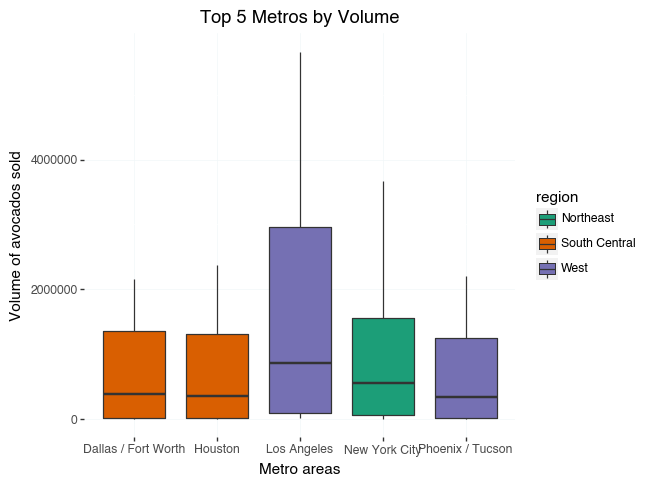

In [44]:
(p9.ggplot(df_arc.query("city in ['Los Angeles', 'New York City', 'Dallas / Fort Worth', 'Houston', 'Phoenix / Tucson']"),
p9.aes(
  x = "city",
  y = "total_volume",
  fill = "region"
))
+ p9.geom_boxplot() 
    + p9.labs(
        title="Top 5 Metros by Volume",
        x="Metro areas", y="Volume of avocados sold") 
    + p9.scale_fill_manual(values={"West":"#7570b3", "Northeast":"#1c9e78",
            "South Central":"#d95f01"})
    + p9.theme(panel_background=p9.element_rect(fill="white"), panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5))
    )

#Pivoting

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only. "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

In [45]:
df_arc_ca = df_arc.query("city in ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']")
df_arc_ca.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,state,region,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,California,West,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,California,West,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,California,West,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,California,West,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,California,West,1,4


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

San Francisco shows the biggest average price difference however it has the highest average price for both conventional and organic already

In [48]:
avg_price_by_city_type = (
    df_arc_ca
    .groupby(['city', 'type'])['average_price']
    .mean()
    .reset_index()
)

print(avg_price_by_city_type)

            city          type  average_price
0    Los Angeles  conventional       1.047124
1    Los Angeles       organic       1.574902
2     Sacramento  conventional       1.295359
3     Sacramento       organic       1.873856
4      San Diego  conventional       1.113856
5      San Diego       organic       1.798366
6  San Francisco  conventional       1.400490
7  San Francisco       organic       2.119444


In [ ]:
#Difference between 
price_diff = (
    df_arc_ca
    .pivot_table(
        values='average_price',
        index='city',
        columns='type',
        aggfunc='mean'
    )
    .reset_index()
)
price_diff['price_difference'] = price_diff['organic'] - price_diff['conventional']

print(price_diff)


type           city  conventional   organic  price_difference
0       Los Angeles      1.047124  1.574902          0.527778
1        Sacramento      1.295359  1.873856          0.578497
2         San Diego      1.113856  1.798366          0.684510
3     San Francisco      1.400490  2.119444          0.718954


8. Recreated plot for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. 


(p9.ggplot(df2,
p9.aes(
  x = "exports",
  y = "imports",
  fill = "four_regions",
  size = "energy"
))
+ p9.geom_boxplot() 
    + p9.labs(
        title="1997",
        x="Exmports (\% of GDP)", y="Imports (\% of GDP)") 
      + p9.theme(figure_size=(10, 4.5))
      + p9.scale_x_continuous(limits=(20, 120))
      + p9.scale_y_continuous(limits=(0, 150))
      + p9.scale_fill_manual( values={"africa":"#00d5e9", "americas":"#99ef33",
            "asia":"#ff5872", "europe":"#ffec33"}, limits=["africa","americas","asia","europe"])
      + p9.theme(panel_background=p9.element_rect(fill="white"), panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5))
      + p9.annotate("text", x=70, y=75, label="1 9 9 7", family= "Helvetica Neue", alpha=0.5, size=140, color="#e1e1e1")
    )

#Using Outside Data